<a href="https://colab.research.google.com/github/carolinalcv/Proyecto/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/CodingDojo-DataScience/blob/main/template_proyecto/template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2

## Datos Personales

* **Nombre Completo**: Carolina Leguizamón
* **ID Coding Dojo**: 0000179745
* **Track**: Machine Learning

## Descripción del Problema

Se requiere predecir el precio de los carros con base en la información del dataset. 

### Descripción del Conjunto de Datos

|   | car_name                               | car_prices_in_rupee | kms_driven | fuel_type | transmission | ownership | manufacture | engine  | Seats   |
|---|----------------------------------------|---------------------|------------|-----------|--------------|-----------|-------------|---------|---------|
| 0 | Jeep Compass 2.0 Longitude Option BSIV | 10.03 Lakh          | 86,226 kms | Diesel    | Manual       | 1st Owner | 2017        | 1956 cc | 5 Seats |
| 1 | Renault Duster RXZ Turbo CVT           | 12.83 Lakh          | 13,248 kms | Petrol    | Automatic    | 1st Owner | 2021        | 1330 cc | 5 Seats |

## Solución

In [266]:
# librerias
 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [267]:
#Google Colab
from google.colab import drive
df = pd.read_csv("/content/car_price.csv")
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


### I.- Análisis Exploratorio

**Manipulación de datos**

In [268]:
#Analizo los datos de manera general
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


(5512, 10)

In [269]:
df.describe()

,Unnamed: 0,manufacture
count,5512.000000,5512.000000
mean,2755.500000,2015.455552
std,1591.321673,3.927974
min,0.000000,1995.000000
25%,1377.750000,2013.000000
50%,2755.500000,2016.000000
75%,4133.250000,2018.000000
max,5511.000000,2022.000000


In [270]:
df.isna().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [271]:
#Reviso los datos de cada una de las columnas 
df["car_name"].value_counts()

Maruti Alto 800 LXI          53
Maruti Swift VXI             46
Maruti Wagon R VXI BS IV     43
Maruti Swift Dzire VDI       42
Maruti Swift Dzire VXI       42
                             ..
Tata New Safari XT            1
Hyundai Creta 1.6 E Plus      1
Toyota Etios 2014-2016 GD     1
Mahindra Marazzo M8 8Str      1
BMW M Series M4 Coupe         1
Name: car_name, Length: 1896, dtype: int64

In [272]:
df["car_prices_in_rupee"].value_counts()

4.50 Lakh     62
3.50 Lakh     62
3 Lakh        58
6.50 Lakh     57
5.50 Lakh     52
              ..
12.03 Lakh     1
15.62 Lakh     1
7.92 Lakh      1
29.25 Lakh     1
31.90 Lakh     1
Name: car_prices_in_rupee, Length: 1300, dtype: int64

In [273]:
#Esta columna la convertiré en float eliminando los strings
#df["car_prices_in_rupee"]=df["car_prices_in_rupee"].str.replace("Lakh","")


In [274]:
#df["car_prices_in_rupee"] = pd.to_numeric(df["car_prices_in_rupee"], downcast="float")
#aún no se puede convertir en valor número por el error: ValueError: Unable to parse string "1.10 Crore" at position 119
#El crore (cr)(del prácrito kroḍi) denota diez millones (10,000,000 o 107 en notación científica) y es igual a 100 lakhs 
#en el sistema de numeración india.

#entonces hay que convertir los valores Crore para poder eliminar ese string


In [275]:
#primero creo otra columna "currency" y asigno la denominación de las monedas.
df.loc[df["car_prices_in_rupee"].str.contains("Lakh"), "currency"] = "Lakh"
df.loc[df["car_prices_in_rupee"].str.contains("Crore"), "currency"] = "Crore"
df.loc[df["currency"].isnull(), "currency"] = "Rupias"

In [276]:
#luego, elimino los string de la columna car prices
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].str.replace("Lakh", "")
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].str.replace("Crore", "")


In [277]:
#convierto los valores en flotantes
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].str.replace(",", "")
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].astype(float)


In [278]:
# en donde la columa currency sea x le pido que haga la respectiva conversión de la moneda. 
#Todas quedan en Lakh porque en rupias quedaban valores muy grandes

df["car_prices_in_rupee"] = np.where(df["currency"] == "Lakh", df["car_prices_in_rupee"], 0)
df["car_prices_in_rupee"] = np.where(df["currency"] == "Crore", df["car_prices_in_rupee"] * 100, df["car_prices_in_rupee"])
df["car_prices_in_rupee"] = np.where(df["currency"] == "Rupias", df["car_prices_in_rupee"] / 100000, df["car_prices_in_rupee"])

In [279]:
#le cambio el nombre a la columna para mayor claridad
df = df.rename(columns={"car_prices_in_rupee": "car_prices_in_lakh"})
#y elimino la columna de currency
df=df.drop(columns="currency",axis=1)

In [280]:
df.head()

,Unnamed: 0,car_name,car_prices_in_lakh,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5512 non-null   int64  
 1   car_name            5512 non-null   object 
 2   car_prices_in_lakh  5512 non-null   float64
 3   kms_driven          5512 non-null   object 
 4   fuel_type           5512 non-null   object 
 5   transmission        5512 non-null   object 
 6   ownership           5512 non-null   object 
 7   manufacture         5512 non-null   int64  
 8   engine              5512 non-null   object 
 9   Seats               5512 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 430.8+ KB


In [282]:
#ahora convertiré a valores numéricos kms_driven 
df["kms_driven"]=df["kms_driven"].str.replace("kms","")
df["kms_driven"]=df["kms_driven"].str.replace(",","")
df["kms_driven"]=df["kms_driven"].str.replace(".","")
df["kms_driven"] = df["kms_driven"].astype(int)

<ipython-input-282-e1a686bb6331>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["kms_driven"]=df["kms_driven"].str.replace(".","")


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5512 non-null   int64  
 1   car_name            5512 non-null   object 
 2   car_prices_in_lakh  5512 non-null   float64
 3   kms_driven          5512 non-null   int64  
 4   fuel_type           5512 non-null   object 
 5   transmission        5512 non-null   object 
 6   ownership           5512 non-null   object 
 7   manufacture         5512 non-null   int64  
 8   engine              5512 non-null   object 
 9   Seats               5512 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 430.8+ KB


In [284]:
#ahora voy a a convertir lo valores de ownership a númericos, como los valores aumentan, la secuencia de 0 a 5 funciona y 
#y no es necesario la codificacióno binaria. 
df["ownership"]=df["ownership"].str.replace("0th Owner","0")
df["ownership"]=df["ownership"].str.replace("1st Owner","1")
df["ownership"]=df["ownership"].str.replace("2nd Owner","2")
df["ownership"]=df["ownership"].str.replace("3rd Owner","3")
df["ownership"]=df["ownership"].str.replace("4th Owner","4")
df["ownership"]=df["ownership"].str.replace("5th Owner","5")
df["ownership"] = df["ownership"].astype(int)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5512 non-null   int64  
 1   car_name            5512 non-null   object 
 2   car_prices_in_lakh  5512 non-null   float64
 3   kms_driven          5512 non-null   int64  
 4   fuel_type           5512 non-null   object 
 5   transmission        5512 non-null   object 
 6   ownership           5512 non-null   int64  
 7   manufacture         5512 non-null   int64  
 8   engine              5512 non-null   object 
 9   Seats               5512 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 430.8+ KB


In [286]:
#ahora voy a a convertir lo valores de engine a númericos
df["engine"]=df["engine"].str.replace("cc","")
df["engine"] = df["engine"].astype(int)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5512 non-null   int64  
 1   car_name            5512 non-null   object 
 2   car_prices_in_lakh  5512 non-null   float64
 3   kms_driven          5512 non-null   int64  
 4   fuel_type           5512 non-null   object 
 5   transmission        5512 non-null   object 
 6   ownership           5512 non-null   int64  
 7   manufacture         5512 non-null   int64  
 8   engine              5512 non-null   int64  
 9   Seats               5512 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 430.8+ KB


In [288]:
#ahora voy a a convertir lo valores de  Seats a númericos
df = df.rename(columns={"Seats": "seats"})
df["seats"]=df["seats"].str.replace("2 Seats","2")
df["seats"]=df["seats"].str.replace("4 Seats","4")
df["seats"]=df["seats"].str.replace("5 Seats","5")
df["seats"]=df["seats"].str.replace("6 Seats","6")
df["seats"]=df["seats"].str.replace("7 Seats","7")
df["seats"]=df["seats"].str.replace("8 Seats","8")
df["seats"] = df["seats"].astype(int)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5512 non-null   int64  
 1   car_name            5512 non-null   object 
 2   car_prices_in_lakh  5512 non-null   float64
 3   kms_driven          5512 non-null   int64  
 4   fuel_type           5512 non-null   object 
 5   transmission        5512 non-null   object 
 6   ownership           5512 non-null   int64  
 7   manufacture         5512 non-null   int64  
 8   engine              5512 non-null   int64  
 9   seats               5512 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 430.8+ KB


In [316]:
#voy a eliminar la columna de unnamed que no es relevante
df = df.drop("Unnamed: 0", axis=1)

**Visualizaciones**

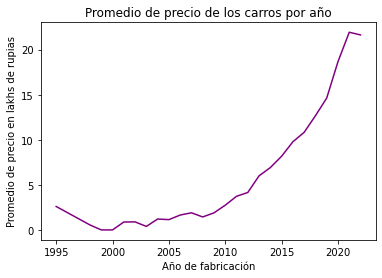

In [295]:
#en el primer gráfico voy a analizarel promedio del precio de los carros en el tiemó

df_grouped = df.groupby("manufacture").mean()

plt.plot(df_grouped["car_prices_in_lakh"],color="purple")
plt.xlabel("Año de fabricación")
plt.ylabel("Promedio de precio en lakhs de rupias")
plt.title("Promedio de precio de los carros por año")

plt.show()


Se puede observar que el promedio del precio de carros ha aumentado con el paso dle tiempo, lo cual es lógico e intuitivo, pero pudo ser confirmado.

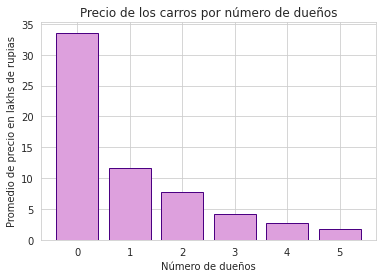

In [305]:
#ahora quiero analizar la influencia del número de dueños que ha tenido un carro en el costo.
#Para ellos haré un gráfico de barras del promedio del precio de los carros en función del númer de dueños.
df_grouped = df.groupby("ownership").mean()

sns.set_style("whitegrid")
plt.bar(df_grouped.index, df_grouped["car_prices_in_lakh"],color="plum",edgecolor = "indigo")
plt.xlabel("Número de dueños")
plt.ylabel("Promedio de precio en lakhs de rupias")
plt.title("Precio de los carros por número de dueños")


plt.show()


El precio de los carros tiende a disminuir a medida que ha tenido más dueños. Se evidencia un salto grande de 0 a 1; lo que quiere decir que cuando es nuevo, el precio es bastante más alto; cuando ha tenido de 1 en adelante la diferencia empiea a ser menos significativa. 

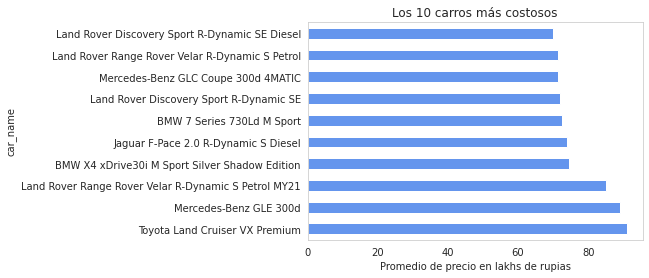

In [310]:
#AHora vamos a visualizar los 10 carros más caros

df_grouped = df.groupby("car_name").mean().sort_values("car_prices_in_lakh", ascending=False).head(10)


df_grouped["car_prices_in_lakh"].plot(kind="barh", color="cornflowerblue")
plt.xlabel("Promedio de precio en lakhs de rupias")
plt.title("Los 10 carros más costosos")
plt.grid()

plt.show()

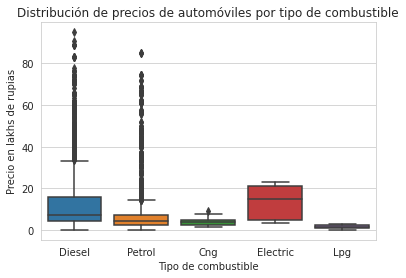

In [312]:
# Ahora voy a comparar la distribución de precios por tipo de combustible
sns.boxplot(x="fuel_type", y="car_prices_in_lakh", data=df)

plt.title("Distribución de precios de carros por tipo de combustible")
plt.xlabel("Tipo de combustible")
plt.ylabel("Precio en lakhs de rupias")

plt.show()

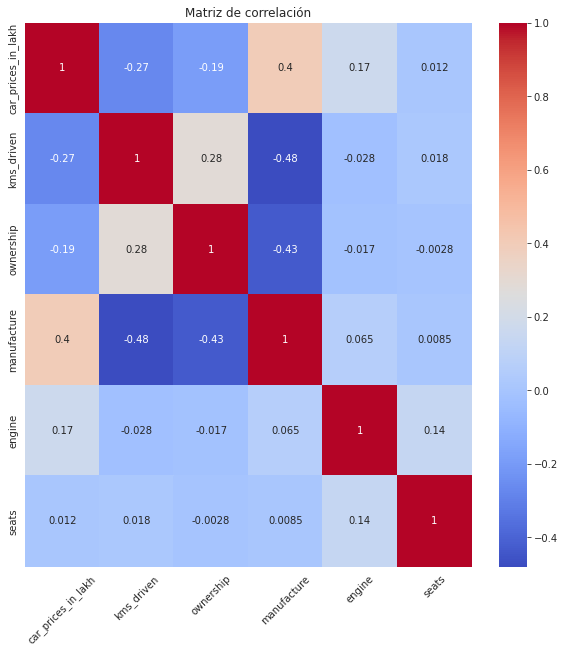

In [322]:
#mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo 
#y las características y/o entre una característica y otra

corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.xticks(rotation=45)


plt.show()

<ul> <li>Se evidencia una correlación fuerte y positiva entre "engine" y "car prices", lo que indica que a medida que el tamaño del motor de un automóvil aumenta, el precio también aumenta.</li> </ul> 
<ul> <li>*El cuadro de correlación manufacture con kms_driven tiene un valor de 0.48 indica que existe una correlación moderada negativa entre las dos variables, lo que significa que a medida que el año de fabricación aumenta, la cantidad de kilómetros que el automóvil ha sido conducido disminuye.</li> </ul>



### II.- Modelos


In [207]:
#convierto las columnas categóricas, rimero fuel type
fuel_dummies = pd.get_dummies(df["fuel_type"], prefix="fuel_type")
df = pd.concat([df, fuel_dummies], axis=1)

In [208]:
df = df.drop(columns="fuel_type")



In [209]:
df.head()

,car_name,car_prices_in_lakh,kms_driven,transmission,ownership,manufacture,engine,seats,fuel_type_Cng,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,fuel_type_Petrol
0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226,Manual,1,2017,1956,5,0,1,0,0,0
1,Renault Duster RXZ Turbo CVT,12.83,13248,Automatic,1,2021,1330,5,0,0,0,0,1
2,Toyota Camry 2.5 G,16.40,60343,Automatic,1,2016,2494,5,0,0,0,0,1
3,Honda Jazz VX CVT,7.77,26696,Automatic,1,2018,1199,5,0,0,0,0,1
4,Volkswagen Polo 1.2 MPI Highline,5.15,69414,Manual,1,2016,1199,5,0,0,0,0,1


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            5512 non-null   object 
 1   car_prices_in_lakh  5512 non-null   float64
 2   kms_driven          5512 non-null   int64  
 3   transmission        5512 non-null   object 
 4   ownership           5512 non-null   int64  
 5   manufacture         5512 non-null   int64  
 6   engine              5512 non-null   int64  
 7   seats               5512 non-null   int64  
 8   fuel_type_Cng       5512 non-null   uint8  
 9   fuel_type_Diesel    5512 non-null   uint8  
 10  fuel_type_Electric  5512 non-null   uint8  
 11  fuel_type_Lpg       5512 non-null   uint8  
 12  fuel_type_Petrol    5512 non-null   uint8  
dtypes: float64(1), int64(5), object(2), uint8(5)
memory usage: 371.5+ KB


In [211]:
#continúo con transmission
transmission_dummies = pd.get_dummies(df["transmission"], prefix="transmission")
df = pd.concat([df, transmission_dummies], axis=1)

In [212]:
df = df.drop(columns="transmission")

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_name                5512 non-null   object 
 1   car_prices_in_lakh      5512 non-null   float64
 2   kms_driven              5512 non-null   int64  
 3   ownership               5512 non-null   int64  
 4   manufacture             5512 non-null   int64  
 5   engine                  5512 non-null   int64  
 6   seats                   5512 non-null   int64  
 7   fuel_type_Cng           5512 non-null   uint8  
 8   fuel_type_Diesel        5512 non-null   uint8  
 9   fuel_type_Electric      5512 non-null   uint8  
 10  fuel_type_Lpg           5512 non-null   uint8  
 11  fuel_type_Petrol        5512 non-null   uint8  
 12  transmission_Automatic  5512 non-null   uint8  
 13  transmission_Manual     5512 non-null   uint8  
dtypes: float64(1), int64(5), object(1), uint

In [214]:
#finalmente la columna car_name
car_name_dummies = pd.get_dummies(df["car_name"], prefix="car_name")
df = pd.concat([df, car_name_dummies], axis=1)

In [215]:
df = df.drop(columns="car_name")

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Columns: 1909 entries, car_prices_in_lakh to car_name_Volvo XC60 Inscription D5 BSIV
dtypes: float64(1), int64(5), uint8(1903)
memory usage: 10.3 MB


In [217]:
df.head()

,car_prices_in_lakh,kms_driven,ownership,manufacture,engine,seats,fuel_type_Cng,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,car_name_Volvo V40 Cross Country D3,car_name_Volvo XC 90 D5 Inscription,car_name_Volvo XC 90 D5 Inscription BSIV,car_name_Volvo XC 90 D5 Momentum BSIV,car_name_Volvo XC60 B5 Inscripition,car_name_Volvo XC60 D4 Summum,car_name_Volvo XC60 D5 Inscription,car_name_Volvo XC60 D5 Summum,car_name_Volvo XC60 Inscription D5,car_name_Volvo XC60 Inscription D5 BSIV
0,10.03,86226,1,2017,1956,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.83,13248,1,2021,1330,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16.40,60343,1,2016,2494,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.77,26696,1,2018,1199,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.15,69414,1,2016,1199,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# solucion

In [ ]:
# solucion

## Conclusiones

* Conclusión 01
* Conclusión 02
* ...


## Referencias

* [Curso MAT281_2022](https://github.com/fralfaro/MAT281_2022)
* [Curso CodingDojo-DataScience](https://github.com/fralfaro/CodingDojo-DataScience)